In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [115]:
L = 0.7
# Define functions of the RHS to be integrated
def fu(u):
    return u

def fv(v):
    return v
    
def dphi_dR(R,z):
    q = 0.7
    v = 1
    return -((v**2*q**2*R)/(q**2*R**2+z**2) - (L**2)/(R**3))

def dphi_dz(R,z):
    q = 0.7
    v = 1
    return -((v**2*z)/(R**2*q**2+z**2))

def Phi(R,z):
    q = 0.7
    v = 1
    return 1/2*v**2*np.log(R**2 + z**2/q**2)+L**2/(2*R**2)

In [121]:
# Setup initial values, time steps, and arrays for the solutions
t0 = 0
tf = 200
u0 = 0.9
v0 = 1
R0 = 1
z0 = 1
n  = 1000001
h  = (tf-t0)/(n-1)

t      = np.linspace(t0,tf,n)
sol_u    = np.zeros([n])
sol_u[0] = u0
sol_v    = np.zeros([n])
sol_v[0] = v0
sol_R    = np.zeros([n])
sol_R[0] = R0
sol_z    = np.zeros([n])
sol_z[0] = z0

# Compute energy given initial values
E = 1/2*(u0**2+v0**2)+Phi(R0,z0)

print(E)

1.7060630039174165


In [122]:
# Perform Euler's Method
for i in range(1,n):
    sol_u[i] = h*dphi_dR(sol_R[i-1],sol_z[i-1]) + sol_u[i-1]
    sol_v[i] = h*dphi_dz(sol_R[i-1],sol_z[i-1]) + sol_v[i-1]
    sol_R[i] = h*fu(sol_u[i-1]) + sol_R[i-1]
    sol_z[i] = h*fv(sol_v[i-1]) + sol_z[i-1]

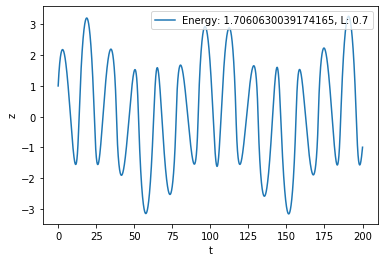

Text(0, 0.5, 'R')

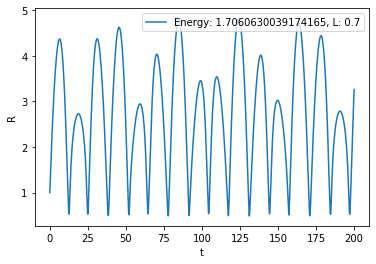

In [123]:
# Plot results
plt.plot(t,sol_z, label = "Energy: %s, L: %s" %(E,L))
plt.legend(loc="upper right")
plt.xlabel("t")
plt.ylabel("z")
#plt.savefig("z_sol.png")
plt.show()
plt.plot(t,sol_R, label = "Energy: %s, L: %s" %(E,L))
plt.legend(loc="upper right")
plt.xlabel("t")
plt.ylabel("R")
#plt.savefig("R_sol.png")

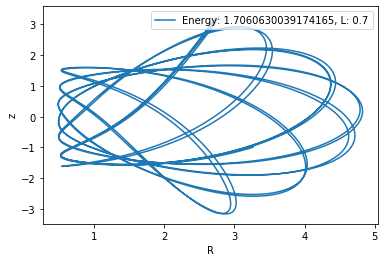

In [124]:
plt.plot(sol_R,sol_z, label = "Energy: %s, L: %s" %(E,L))
plt.legend(loc="upper right")
plt.xlabel("R")
plt.ylabel("z")
plt.savefig("meridional_plane_4.png")

Text(0, 0.5, 'dR/dt')

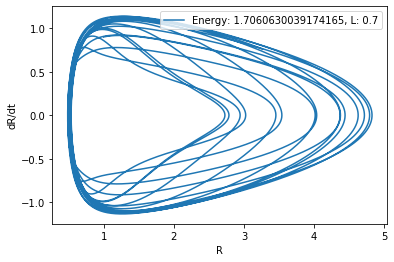

In [125]:
plt.plot(sol_R,sol_u, label = "Energy: %s, L: %s" %(E,L))
plt.legend(loc="upper right")
plt.xlabel("R")
plt.ylabel("dR/dt")
#plt.savefig("z_z_dot.png")

Text(0, 0.5, 'dz/dt')

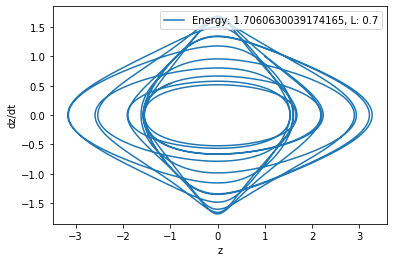

In [126]:
plt.plot(sol_z,sol_v, label = "Energy: %s, L: %s" %(E,L))
plt.legend(loc="upper right")
plt.xlabel("z")
plt.ylabel("dz/dt")
#plt.savefig("z_z_dot.png")

In [127]:
def isclose(a, b, rel_tol=1e-02, abs_tol=1e-02):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

surf_R  = []
surf_dR = []

for i in range(len(sol_R)):
    if isclose(0,sol_z[i]) and sol_v[i] > 0:
        surf_R.append(sol_R[i])
        surf_dR.append(sol_u[i])

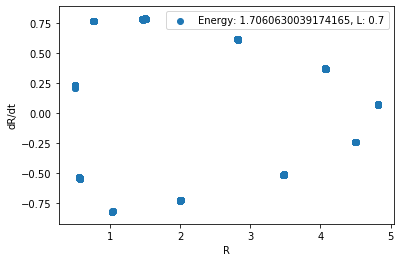

In [133]:
plt.scatter(surf_R,surf_dR,label = "Energy: %s, L: %s" %(E,L))
plt.xlabel("R")
plt.ylabel("dR/dt")
plt.legend(loc = "upper right")